### Домашнее задание по ML №3

##### Имеются данные adult.csv (см. в материалах к занятию)

##### Целевой переменной является уровень дохода income (крайний правый столбец).

##### Описание признаков можно найти по ссылке http://www.cs.toronto.edu/~delve/data/adult/adultDetail.html

*Выдержка с сайта:*

`5. Number of Instances`

48842 instances, mix of continuous and discrete (train=32561, test=16281)

45222 if instances with unknown values are removed (train=30162, test=15060)

Split into train-test using MLC++ GenCVFiles (2/3, 1/3 random).

`6. Number of Attributes`

6 continuous, 8 nominal attributes.

`7. Attribute Information:`

age: continuous.

workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.

fnlwgt: continuous.

education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 
10th, Doctorate, 5th-6th, Preschool.

education-num: continuous.

marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.

occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-
inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.

relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.

race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.

sex: Female, Male.

capital-gain: continuous.

capital-loss: continuous.

hours-per-week: continuous.

native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, 
Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, 
Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-
Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

class: >50K, <=50K

`8. Missing Attribute Values:`

7% have missing values.

##### Вам необходимо построить модель логистической регрессии, которая предсказывает уровень дохода человека. При возможности попробуйте улучшить точность предсказаний (метод score) с помощью перебора признаков.

### 1. Первичный анализ

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('adult.csv')
df.head(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


In [3]:
# пропущенных значений нет (но есть дефектные: с '?')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
age                48842 non-null int64
workclass          48842 non-null object
fnlwgt             48842 non-null int64
education          48842 non-null object
educational-num    48842 non-null int64
marital-status     48842 non-null object
occupation         48842 non-null object
relationship       48842 non-null object
race               48842 non-null object
gender             48842 non-null object
capital-gain       48842 non-null int64
capital-loss       48842 non-null int64
hours-per-week     48842 non-null int64
native-country     48842 non-null object
income             48842 non-null object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [4]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [5]:
# список колонок
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

Посмотрим пару стобцов с дефектными значениями (оценим количество строк)

In [6]:
len(df[ df['workclass'] == '?' ].index)

2799

In [7]:
len(df[ df['occupation'] == '?' ].index)

2809

Напишем цикл для определения масштаба проблемы "дефектных значений"

In [8]:
columns_with_questions = [] # список колонок, содержащих значение '?'
set_question_rows = set() # множество индексов строк, содержащих значение '?'
dict_question_rows = {}
columns = list(df.columns)

for column in columns:
    try:
        print('Для поля {0} значений с "?": {1} шт.'.format(column, len(df[ df[column] == '?' ].index)))
        if len(df[ df[column] == '?' ].index) > 0:
            columns_with_questions.append(column)
        set_question_rows.update(set(df[ df[column] == '?' ].index))
        d1 = {"Russia":"Moscow", "USA":"Washington"}
        dict_question_rows[column]=list(df[ df[column] == '?' ].index)
    except:
        print('Для поля {0} значений с "?": {1} шт.'.format(column , 0))

print ('\nСписок полей с таким значением: ', columns_with_questions)

print('\nДоля строк с дефектными значениями: {:.2%}'.format(len(set_question_rows)/df.shape[0]))

C:\Users\User\Anaconda3\lib\site-packages\pandas\core\ops.py:1167: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


Для поля age значений с "?": 0 шт.
Для поля workclass значений с "?": 2799 шт.
Для поля fnlwgt значений с "?": 0 шт.
Для поля education значений с "?": 0 шт.
Для поля educational-num значений с "?": 0 шт.
Для поля marital-status значений с "?": 0 шт.
Для поля occupation значений с "?": 2809 шт.
Для поля relationship значений с "?": 0 шт.
Для поля race значений с "?": 0 шт.
Для поля gender значений с "?": 0 шт.
Для поля capital-gain значений с "?": 0 шт.
Для поля capital-loss значений с "?": 0 шт.
Для поля hours-per-week значений с "?": 0 шт.
Для поля native-country значений с "?": 857 шт.
Для поля income значений с "?": 0 шт.

Список полей с таким значением:  ['workclass', 'occupation', 'native-country']

Доля строк с дефектными значениями: 7.41%


Дропнуть 7,41 процента данных - слишком легкий путь. Поработаем с "дефектными" значениями.

Предполагаю, что искомые значения в основном могут встречаться по нескольку раз в одной строке (во всех столбцах из списка columns_with_questions)
, но нужно проверить. Напишем еще один цикл для этого.

### 2. Обработка "дефектных" значений

In [9]:
for column in columns_with_questions:

    change = len(df[ df[column] == '?' ].index)
    df[column] = df[column].replace(['?'], method='ffill')
    print('Для поля {0} методом "ffill" заменено {1} значений'.format(column, change))

Для поля workclass методом "ffill" заменено 2799 значений
Для поля occupation методом "ffill" заменено 2809 значений
Для поля native-country методом "ffill" заменено 857 значений


In [10]:
# можно было бы заполнить самыми распространенными значениями, 
# но это больше исказит картину, чем применение метода замены на предыдущее значение

for column in columns_with_questions:
    most_popular = df[column].value_counts().index[0]
    most_popular_value = df[column].value_counts().values[0]
    share = most_popular_value/len(df[column])
    print('Для поля "{0}" самое популярное значение "{1}" (доля {2:.2%})'.format(column, most_popular, share))

Для поля "workclass" самое популярное значение "Private" (доля 73.75%)
Для поля "occupation" самое популярное значение "Prof-specialty" (доля 13.42%)
Для поля "native-country" самое популярное значение "United-States" (доля 91.34%)


In [11]:
# для 'occupation' вообще неочевидно, стоит ли заполнять самым популярным значением
df['occupation'].value_counts()

Prof-specialty       6557
Craft-repair         6510
Exec-managerial      6459
Adm-clerical         5935
Sales                5813
Other-service        5202
Machine-op-inspct    3226
Transport-moving     2507
Handlers-cleaners    2223
Farming-fishing      1570
Tech-support         1531
Protective-serv      1031
Priv-house-serv       261
Armed-Forces           17
Name: occupation, dtype: int64

In [12]:
# Данные очищены от дефектных значений. ПОсмотрим на них.
df.head(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,Private,103497,Some-college,10,Never-married,Machine-op-inspct,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,Private,227026,HS-grad,9,Never-married,Other-service,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


In [13]:
# при этом сохранили все 48842 строк
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
age                48842 non-null int64
workclass          48842 non-null object
fnlwgt             48842 non-null int64
education          48842 non-null object
educational-num    48842 non-null int64
marital-status     48842 non-null object
occupation         48842 non-null object
relationship       48842 non-null object
race               48842 non-null object
gender             48842 non-null object
capital-gain       48842 non-null int64
capital-loss       48842 non-null int64
hours-per-week     48842 non-null int64
native-country     48842 non-null object
income             48842 non-null object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


Проверим, какие есть уникальные значения ('fnlwgt не смотрим, там много)

In [14]:
for column in columns:
    if column != 'fnlwgt':
        print(column,'\n', sorted(df[column].unique()),'\n', len(df[column].unique()), ' уникальных значений\n')

age 
 [17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90] 
 74  уникальных значений

workclass 
 ['Federal-gov', 'Local-gov', 'Never-worked', 'Private', 'Self-emp-inc', 'Self-emp-not-inc', 'State-gov', 'Without-pay'] 
 8  уникальных значений

education 
 ['10th', '11th', '12th', '1st-4th', '5th-6th', '7th-8th', '9th', 'Assoc-acdm', 'Assoc-voc', 'Bachelors', 'Doctorate', 'HS-grad', 'Masters', 'Preschool', 'Prof-school', 'Some-college'] 
 16  уникальных значений

educational-num 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16] 
 16  уникальных значений

marital-status 
 ['Divorced', 'Married-AF-spouse', 'Married-civ-spouse', 'Married-spouse-absent', 'Never-married', 'Separated', 'Widowed'] 
 7  уникальных значений

occupation 
 ['Adm-cler

Предполагаю, что есть численные значения, равные нулю, которые наверно встречаются сильно чаще других. Проверим.

In [15]:
# Проверим для'capital-gain'. Так и есть: ноли превалируют

In [16]:
df['capital-gain'].value_counts()[:10]

0        44807
15024      513
7688       410
7298       364
99999      244
3103       152
5178       146
5013       117
4386       108
8614        82
Name: capital-gain, dtype: int64

In [17]:
len(df[df['capital-gain']==0]) / len(df['capital-gain'])

0.9173866754023177

In [18]:
# Проверим для'capital-loss'. Так и есть: ноли тоже превалируют

In [19]:
df['capital-loss'].value_counts()[:10]

0       46560
1902      304
1977      253
1887      233
2415       72
1485       71
1848       67
1590       62
1602       62
1876       59
Name: capital-loss, dtype: int64

In [20]:
len(df[df['capital-loss']==0]) / len(df['capital-loss'])

0.9532779165472339

### 3. Обработка категориальных переменных, категоризация

**Для этих полей сделаем замену категориальных переменных на числовую (бинарную):**

'gender', 'capital-gain', 'capital-loss', 'income'

**Для этих полей сделаем get_dummies:**

'workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'native-country'

**Для этих полей сделаем категоризацию:**

'age', 'hours-per-week'

**Для этих полей все оставим как есть:**

'educational-num'

*Делаем замену категориальных переменных на числовую (бинарную) для 'gender'*

In [21]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [22]:
le.fit( df['gender'] )

LabelEncoder()

In [23]:
le.classes_

array(['Female', 'Male'], dtype=object)

In [24]:
df['gender'] = pd.Series( data = le.transform( df['gender'] ) )

In [25]:
df.head(5)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,1,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,1,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,1,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,1,7688,0,40,United-States,>50K
4,18,Private,103497,Some-college,10,Never-married,Machine-op-inspct,Own-child,White,0,0,0,30,United-States,<=50K


*Делаем замену категориальных переменных на числовую (бинарную) для 'capital-gain'*

In [26]:
capital_gain_list = []

for i in df['capital-gain']:
    if i == 0:
        capital_gain_list.append(i)
    else:
        capital_gain_list.append(1)
        

In [27]:
len(df['capital-gain']) == len(capital_gain_list)

True

In [28]:
df['capital-gain'] = capital_gain_list

In [29]:
df.head(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,1,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,1,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,1,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,1,1,0,40,United-States,>50K
4,18,Private,103497,Some-college,10,Never-married,Machine-op-inspct,Own-child,White,0,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,1,0,0,30,United-States,<=50K
6,29,Private,227026,HS-grad,9,Never-married,Other-service,Unmarried,Black,1,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,1,1,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,0,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,1,0,0,10,United-States,<=50K


*Делаем замену категориальных переменных на числовую (бинарную) для 'capital-loss'*

In [30]:
capital_loss_list = []

for i in df['capital-loss']:
    if i == 0:
        capital_loss_list.append(i)
    else:
        capital_loss_list.append(1)

In [31]:
len(df['capital-loss']) == len(capital_loss_list)

True

In [32]:
df['capital-loss'] = capital_loss_list

In [33]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,1,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,1,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,1,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,1,1,0,40,United-States,>50K
4,18,Private,103497,Some-college,10,Never-married,Machine-op-inspct,Own-child,White,0,0,0,30,United-States,<=50K


*Делаем замену категориальных переменных на числовую (бинарную) для 'income'*

In [34]:
le2 = LabelEncoder()

In [35]:
le2.fit( df['income'] )

LabelEncoder()

In [36]:
le2.classes_

array(['<=50K', '>50K'], dtype=object)

In [37]:
df['income'] = pd.Series( data = le2.transform( df['income'] ) )

In [38]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,1,0,0,40,United-States,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,1,0,0,50,United-States,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,1,0,0,40,United-States,1
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,1,1,0,40,United-States,1
4,18,Private,103497,Some-college,10,Never-married,Machine-op-inspct,Own-child,White,0,0,0,30,United-States,0


*Для этих полей сделаем get_dummies:*

*'workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'native-country'*

In [39]:
# попробуем выбрать какие-нибудь признаки
columns_to_encode = [ 'workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'native-country' ]

# столбец sport является категориальной переменной
# переведем ее в значения 0 и 1, добавив столбцы с соответствующими названиями
df_encoded = pd.get_dummies( df, prefix=None, prefix_sep='_', columns=columns_to_encode)

df_encoded.head()

,age,fnlwgt,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,workclass_Federal-gov,workclass_Local-gov,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,25,226802,7,1,0,0,40,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,38,89814,9,1,0,0,50,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,28,336951,12,1,0,0,40,1,0,1,...,0,0,0,0,0,0,0,1,0,0
3,44,160323,10,1,1,0,40,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,18,103497,10,0,0,0,30,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [40]:
# убедимся, все ли хорошо
list(df_encoded.columns)

['age',
 'fnlwgt',
 'educational-num',
 'gender',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'income',
 'workclass_Federal-gov',
 'workclass_Local-gov',
 'workclass_Never-worked',
 'workclass_Private',
 'workclass_Self-emp-inc',
 'workclass_Self-emp-not-inc',
 'workclass_State-gov',
 'workclass_Without-pay',
 'education_10th',
 'education_11th',
 'education_12th',
 'education_1st-4th',
 'education_5th-6th',
 'education_7th-8th',
 'education_9th',
 'education_Assoc-acdm',
 'education_Assoc-voc',
 'education_Bachelors',
 'education_Doctorate',
 'education_HS-grad',
 'education_Masters',
 'education_Preschool',
 'education_Prof-school',
 'education_Some-college',
 'marital-status_Divorced',
 'marital-status_Married-AF-spouse',
 'marital-status_Married-civ-spouse',
 'marital-status_Married-spouse-absent',
 'marital-status_Never-married',
 'marital-status_Separated',
 'marital-status_Widowed',
 'occupation_Adm-clerical',
 'occupation_Armed-Forces',
 'occupation_Craft-repair',
 'o

*Для этих полей сделаем категоризацию:*

*'age', 'hours-per-week'*

In [41]:
# делим людей на возрастные группы
def process_old(old):
    if old < 21:
        return 'young'
    elif 21 <= old < 30:
        return 'adult'
    elif 30 <= old < 40:
        return 'more_adult'
    elif 40 <= old < 50:
        return 'pre_retirement'
    elif 50 <= old < 60:
        return 'pensioner'
    elif 60 <= old:
        return 'old_man'

In [42]:
df_encoded.head()

,age,fnlwgt,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,workclass_Federal-gov,workclass_Local-gov,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,25,226802,7,1,0,0,40,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,38,89814,9,1,0,0,50,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,28,336951,12,1,0,0,40,1,0,1,...,0,0,0,0,0,0,0,1,0,0
3,44,160323,10,1,1,0,40,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,18,103497,10,0,0,0,30,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [43]:
df_encoded['age'] = df_encoded['age'].apply(lambda x: process_old(x))

In [44]:
df_encoded.head()

,age,fnlwgt,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,workclass_Federal-gov,workclass_Local-gov,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,adult,226802,7,1,0,0,40,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,more_adult,89814,9,1,0,0,50,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,adult,336951,12,1,0,0,40,1,0,1,...,0,0,0,0,0,0,0,1,0,0
3,pre_retirement,160323,10,1,1,0,40,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,young,103497,10,0,0,0,30,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [45]:
# вторая полезная функция

In [46]:
# делим количество часов в неделю на категории
def process_hours(hours):
    if hours < 10:
        return 'loafers'
    elif 10 <= hours < 20:
        return '10_20_hours_workers'
    elif 20 <= hours < 30:
        return '20_30_hours_workers'
    elif 30 <= hours < 40:
        return '30_40_hours_workers'
    elif 40 <= hours < 50:
        return '40_50_hours_workers'
    elif 50 <= hours < 60:
        return '50_60_hours_workers'
    elif 60 <= hours < 70:
        return '60_70_hours_workers'
    elif 70 <= hours < 80:
        return '70_80_hours_workers'
    elif 80 <= hours < 0:
        return '80_90_hours_workers'
    elif 90 <= hours:
        return 'workaholics'

In [47]:
df_encoded['hours-per-week'] = df_encoded['hours-per-week'].apply(lambda x: process_hours(x))

In [48]:
df_encoded.head()

,age,fnlwgt,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,workclass_Federal-gov,workclass_Local-gov,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,adult,226802,7,1,0,0,40_50_hours_workers,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,more_adult,89814,9,1,0,0,50_60_hours_workers,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,adult,336951,12,1,0,0,40_50_hours_workers,1,0,1,...,0,0,0,0,0,0,0,1,0,0
3,pre_retirement,160323,10,1,1,0,40_50_hours_workers,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,young,103497,10,0,0,0,30_40_hours_workers,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [49]:
# теперь заэнкодим оставшиеся категориальные переменные
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Columns: 105 entries, age to native-country_Yugoslavia
dtypes: int32(2), int64(4), object(2), uint8(97)
memory usage: 7.1+ MB


In [50]:
prepared_data = pd.get_dummies( df_encoded)

In [51]:
prepared_data.head()

,fnlwgt,educational-num,gender,capital-gain,capital-loss,income,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,age_young,hours-per-week_10_20_hours_workers,hours-per-week_20_30_hours_workers,hours-per-week_30_40_hours_workers,hours-per-week_40_50_hours_workers,hours-per-week_50_60_hours_workers,hours-per-week_60_70_hours_workers,hours-per-week_70_80_hours_workers,hours-per-week_loafers,hours-per-week_workaholics
0,226802,7,1,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
1,89814,9,1,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
2,336951,12,1,0,0,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
3,160323,10,1,1,0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,103497,10,0,0,0,0,0,0,0,1,...,1,0,0,1,0,0,0,0,0,0


In [52]:
# проверим, все ли нужные колонки обработались
list(prepared_data.columns)

['fnlwgt',
 'educational-num',
 'gender',
 'capital-gain',
 'capital-loss',
 'income',
 'workclass_Federal-gov',
 'workclass_Local-gov',
 'workclass_Never-worked',
 'workclass_Private',
 'workclass_Self-emp-inc',
 'workclass_Self-emp-not-inc',
 'workclass_State-gov',
 'workclass_Without-pay',
 'education_10th',
 'education_11th',
 'education_12th',
 'education_1st-4th',
 'education_5th-6th',
 'education_7th-8th',
 'education_9th',
 'education_Assoc-acdm',
 'education_Assoc-voc',
 'education_Bachelors',
 'education_Doctorate',
 'education_HS-grad',
 'education_Masters',
 'education_Preschool',
 'education_Prof-school',
 'education_Some-college',
 'marital-status_Divorced',
 'marital-status_Married-AF-spouse',
 'marital-status_Married-civ-spouse',
 'marital-status_Married-spouse-absent',
 'marital-status_Never-married',
 'marital-status_Separated',
 'marital-status_Widowed',
 'occupation_Adm-clerical',
 'occupation_Armed-Forces',
 'occupation_Craft-repair',
 'occupation_Exec-managerial',

### 4. Подготовка данных (разбиение на train и test, нормирование данных)

In [53]:
# Разобъем данные на train в размере 80% и test в размере 20%
x = prepared_data.drop(['income'], axis=1, inplace=False)
y = prepared_data['income']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state=42)

In [54]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(39073, 117)
(39073,)
(9769, 117)
(9769,)


Нормируем данные

In [55]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [56]:
x_train_normed=pd.DataFrame(scaler.fit_transform(x_train), columns=x_train.columns)
x_train_normed.head()

C:\Users\User\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int32, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8, int32, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,fnlwgt,educational-num,gender,capital-gain,capital-loss,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,...,age_young,hours-per-week_10_20_hours_workers,hours-per-week_20_30_hours_workers,hours-per-week_30_40_hours_workers,hours-per-week_40_50_hours_workers,hours-per-week_50_60_hours_workers,hours-per-week_60_70_hours_workers,hours-per-week_70_80_hours_workers,hours-per-week_loafers,hours-per-week_workaholics
0,-0.421839,-0.029836,0.703432,-0.299736,-0.223883,-0.178385,-0.269023,-0.015179,0.596062,-0.196808,...,-0.28467,-0.199043,-0.281506,-0.357506,0.885479,-0.369464,-0.239461,-0.120147,-0.1235,-0.06784
1,-0.138604,-1.585248,0.703432,-0.299736,-0.223883,-0.178385,-0.269023,-0.015179,-1.677678,-0.196808,...,-0.28467,-0.199043,-0.281506,2.797155,-1.129332,-0.369464,-0.239461,-0.120147,-0.1235,-0.06784
2,-0.161041,-0.418689,0.703432,-0.299736,-0.223883,-0.178385,3.717152,-0.015179,-1.677678,-0.196808,...,-0.28467,-0.199043,-0.281506,-0.357506,0.885479,-0.369464,-0.239461,-0.120147,-0.1235,-0.06784
3,-0.605742,-0.418689,-1.421602,-0.299736,-0.223883,-0.178385,-0.269023,-0.015179,0.596062,-0.196808,...,-0.28467,-0.199043,-0.281506,-0.357506,0.885479,-0.369464,-0.239461,-0.120147,-0.1235,-0.06784
4,-1.529544,0.359017,0.703432,-0.299736,-0.223883,-0.178385,-0.269023,-0.015179,0.596062,-0.196808,...,-0.28467,-0.199043,-0.281506,-0.357506,-1.129332,2.706622,-0.239461,-0.120147,-0.1235,-0.06784


In [57]:
x_test_normed=pd.DataFrame(scaler.fit_transform(x_test), columns=x_test.columns)
x_test_normed.head()

C:\Users\User\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int32, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8, int32, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,fnlwgt,educational-num,gender,capital-gain,capital-loss,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,...,age_young,hours-per-week_10_20_hours_workers,hours-per-week_20_30_hours_workers,hours-per-week_30_40_hours_workers,hours-per-week_40_50_hours_workers,hours-per-week_50_60_hours_workers,hours-per-week_60_70_hours_workers,hours-per-week_70_80_hours_workers,hours-per-week_loafers,hours-per-week_workaholics
0,-1.472342,-0.421925,-1.413671,-0.301495,-0.211162,-0.179823,-0.27005,-0.010118,0.598436,-0.188732,...,-0.276539,-0.207163,-0.275895,-0.357673,0.867707,-0.36257,-0.237834,-0.114767,-0.108178,-0.059098
1,-0.722959,-0.421925,0.707378,-0.301495,-0.211162,-0.179823,-0.27005,-0.010118,0.598436,-0.188732,...,-0.276539,-0.207163,-0.275895,-0.357673,0.867707,-0.36257,-0.237834,-0.114767,-0.108178,-0.059098
2,-0.180856,1.135671,-1.413671,3.316810,-0.211162,-0.179823,-0.27005,-0.010118,0.598436,-0.188732,...,-0.276539,-0.207163,-0.275895,-0.357673,0.867707,-0.36257,-0.237834,-0.114767,-0.108178,-0.059098
3,-0.028003,-0.421925,0.707378,-0.301495,-0.211162,-0.179823,-0.27005,-0.010118,0.598436,-0.188732,...,-0.276539,-0.207163,-0.275895,-0.357673,0.867707,-0.36257,-0.237834,-0.114767,-0.108178,-0.059098
4,0.828207,1.135671,-1.413671,-0.301495,-0.211162,-0.179823,-0.27005,-0.010118,0.598436,-0.188732,...,-0.276539,-0.207163,-0.275895,2.795852,-1.152462,-0.36257,-0.237834,-0.114767,-0.108178,-0.059098


Используем Метод главных компонент (PCA) для оценки полезности фич

In [58]:
import matplotlib.pyplot as plt

Text(0,0.5,'explained_variance_ratio_')

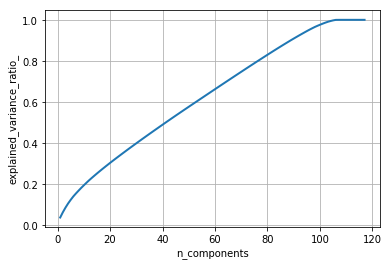

In [59]:
from sklearn.decomposition import PCA

pca = PCA().fit(x_train_normed)

cum_evr = np.cumsum(pca.explained_variance_ratio_)
xs = np.arange(cum_evr.size) + 1
plt.plot(xs, cum_evr, linewidth=2)
plt.grid()
plt.xlabel('n_components')
plt.ylabel('explained_variance_ratio_')

In [60]:
# Кажется, большая часть фичей важна, примерно 105 признаков из 117 объясняют всю дисперсию

### 5. Построение и оценка модели

In [61]:
from sklearn.linear_model import LogisticRegression

In [62]:
model = LogisticRegression()

In [63]:
# обучаем модель

model.fit( x_train_normed, y_train )


C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [64]:
predictions = model.predict_proba( x_test_normed )

In [65]:
model.predict(x_test_normed)

array([0, 0, 1, ..., 0, 0, 1])

In [66]:
predictions

array([[9.84162421e-01, 1.58375792e-02],
       [9.27237165e-01, 7.27628352e-02],
       [4.44565576e-01, 5.55434424e-01],
       ...,
       [6.47805240e-01, 3.52194760e-01],
       [9.99697017e-01, 3.02983371e-04],
       [2.27282254e-01, 7.72717746e-01]])

In [67]:
# сравниваем факт с предсказаниями
threshold = 0.5 # этот порог чувствительности можно поменять
all_lines_count = 0
counter = 0

for line in zip( predictions[:, 1], y_test ):
    if (line[1]==1 and line[0] >= threshold) or (line[1]==0 and line[0] < threshold):
        counter += 1
    all_lines_count += 1

In [68]:
counter / all_lines_count

0.8529020370559934

In [69]:
model.score(x_test_normed, y_test)

0.8529020370559934

#### Accuracy 0.85 - достойный результат!

In [70]:
# воспользуемся готовыми метриками из библиотеки
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score, f1_score, precision_score, recall_score

In [71]:
f1 = np.round(f1_score(y_test, model.predict(x_test_normed).round()),5)
presicion = np.round(precision_score(y_test, model.predict(x_test_normed).round()),5)
recall = np.round(recall_score(y_test, model.predict(x_test_normed).round()),5)

print("F1-score:" , f1)
print("Precision_score:" , presicion)
print("Recall_score:" , recall)

F1-score: 0.66004
Precision_score: 0.72019
Recall_score: 0.60917


In [72]:
from sklearn.metrics import classification_report


In [73]:
print(classification_report(y_test, model.predict(x_test_normed)))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91      7479
           1       0.72      0.61      0.66      2290

   micro avg       0.85      0.85      0.85      9769
   macro avg       0.80      0.77      0.78      9769
weighted avg       0.85      0.85      0.85      9769

